---
title: Modeling pipeline with fastai's Mid-Level API (draft)
---

## Creating a dataloader

In [1]:
from fastai.vision.all import *

dPath = Path("../data/mnist_png/")

In [2]:
get_image_files(dPath)

(#70000) [Path('../data/mnist_png/testing/0/10.png'),Path('../data/mnist_png/testing/0/1001.png'),Path('../data/mnist_png/testing/0/1009.png'),Path('../data/mnist_png/testing/0/101.png'),Path('../data/mnist_png/testing/0/1034.png'),Path('../data/mnist_png/testing/0/1047.png'),Path('../data/mnist_png/testing/0/1061.png'),Path('../data/mnist_png/testing/0/1084.png'),Path('../data/mnist_png/testing/0/1094.png'),Path('../data/mnist_png/testing/0/1121.png')...]

In [3]:
dataset = DataBlock(
                blocks = (ImageBlock(cls = PILImageBW), CategoryBlock),
                get_items = get_image_files,
                splitter = GrandparentSplitter(train_name='training', valid_name='testing'),
                get_y = parent_label,
                item_tfms = Resize(28),
                batch_tfms = None
            )

dls = dataset.dataloaders(dPath, bs=128)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
10


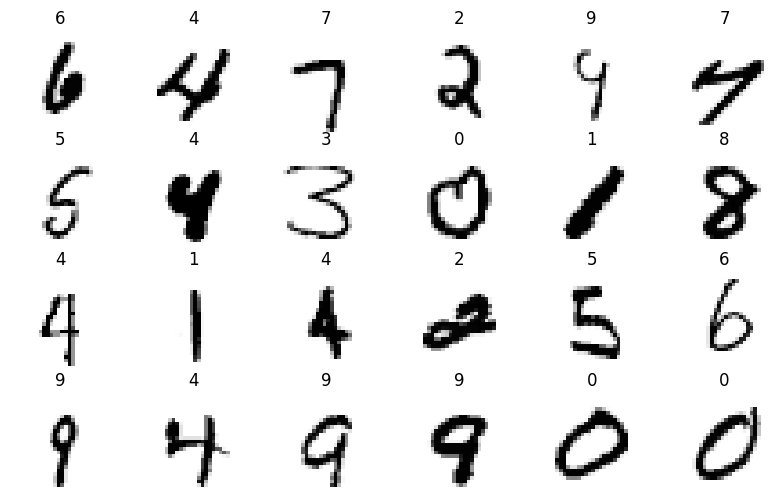

In [4]:
print(dls.vocab) ## Prints class labels
print(dls.c) ## Prints number of classes
dls.show_batch(max_n=24,figsize=(10,6)) ## Show sample data

In [5]:
dls.one_batch()[0].shape, dls.one_batch()[1].shape

(torch.Size([128, 1, 28, 28]), torch.Size([128]))

In [6]:
class MLP(nn.Module):
    def __init__(self, n_in, n_out):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(n_in, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, n_out)
        )
    def forward(self, x):
        return self.model(x.view(-1,784))

In [7]:
## Defining the learner
model = MLP(784, 10)
mlp_learner = Learner(
    dls = dls, 
    model=model, 
    loss_func=F.cross_entropy, 
    model_dir=dPath/"models",
    metrics=accuracy)

In [ ]:
## Finidng Ideal learning late
mlp_learner.lr_find()

In [ ]:
mlp_learner.fit_one_cycle(5,5e-2)